# **Providing data-driven solutions for HR dept**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and reached out for help. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## **Pace: Plan**

### Get farmiliar with the HR dataset 

In this dataset, there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

### Load the dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv(r'C:\Users\user\Desktop\Course 7\HR_capstone_dataset.csv')

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###  Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers) 



In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Firstly display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department',
                         'number_project': 'project_number'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'project_number',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
project_number           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Quick Insight: There are no null values

In [8]:
# Check for duplicates
duplicate=df0.duplicated().sum()

In [9]:
duplicate

3008

In [10]:
(duplicate/len(df0)*100)

20.05467031135409

We see that there are `3008` duplicates, which is about `20.1%` of the whole data.


How likely is it that these are legitimate entries? In other words, how possibleis it that two employees self-reported the same response for every column. It will be a wise decision to confirm this with the origin of the data.

In [11]:
# make a copy of the original data
df1= df0.copy()

# Drop duplicates and save resulting dataframe in a new variable as needed
df1= df1.drop_duplicates(keep= 'first')

# Print the number of rows and coumns
print(df1.shape)

# Display first few rows
(df1.head(5))

(11991, 10)


,satisfaction_level,last_evaluation,project_number,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

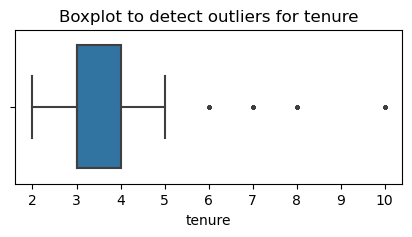

In [12]:
# Create a boxplot to visualize distribution of tenure
plt.figure(figsize= (5,2))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'],fliersize=2)
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [13]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25= df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75= df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr= percentile75- percentile25

upper_limit= percentile75 + 1.5*iqr
lower_limit= percentile25 - 1.5*iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more resilient to outliers than others. When we get to the stage of building the model, we should consider whether to remove these outliers based on the type of model we will be using.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables) 

### Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

We could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `project_number`, comparing the distributions of employees who stayed versus those who left.

So, we will also plot a stacked histogram to visualize the distribution of `project_number` for those who stayed and those who left.

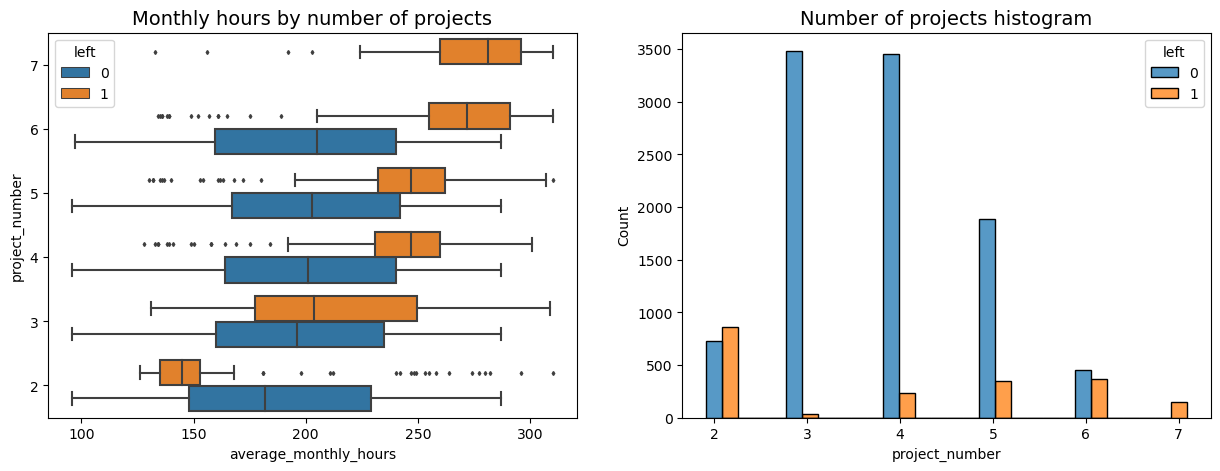

In [15]:
# Set figure and axes
fig, ax= plt.subplots(1,2, figsize= (15, 5))

# Create boxplot showing `avg_monthly_hours` distributions for `project_number`, comparing employees who stayed versus those who left
sns.boxplot(data= df1, x= 'average_monthly_hours', y= 'project_number', hue= 'left', orient= 'h', fliersize=2, ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize=14)

#  Create histogram showing distribution of `nproject_number`, comparing employees who stayed vs those who left
sns.histplot(data= df1, x='project_number', hue= 'left', multiple= 'dodge',shrink= 2, ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize=14)

# Display the plot
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. Less employees were seen to leave the company for those in this cohort

4. If we assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, we could confirm that all employees with seven projects actually left the company.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['project_number']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

**Quick Insight:**
The output of the above cell shows that everyone that worked on `7` projects left the company, because 1 stands for `left`, ehile 0 stands for `stayed`. We have validated the histogram above that shows that all employees who worked on 7 projects left

**For the next visualization, it might be interesting to visualize satisfaction levels by tenure.**

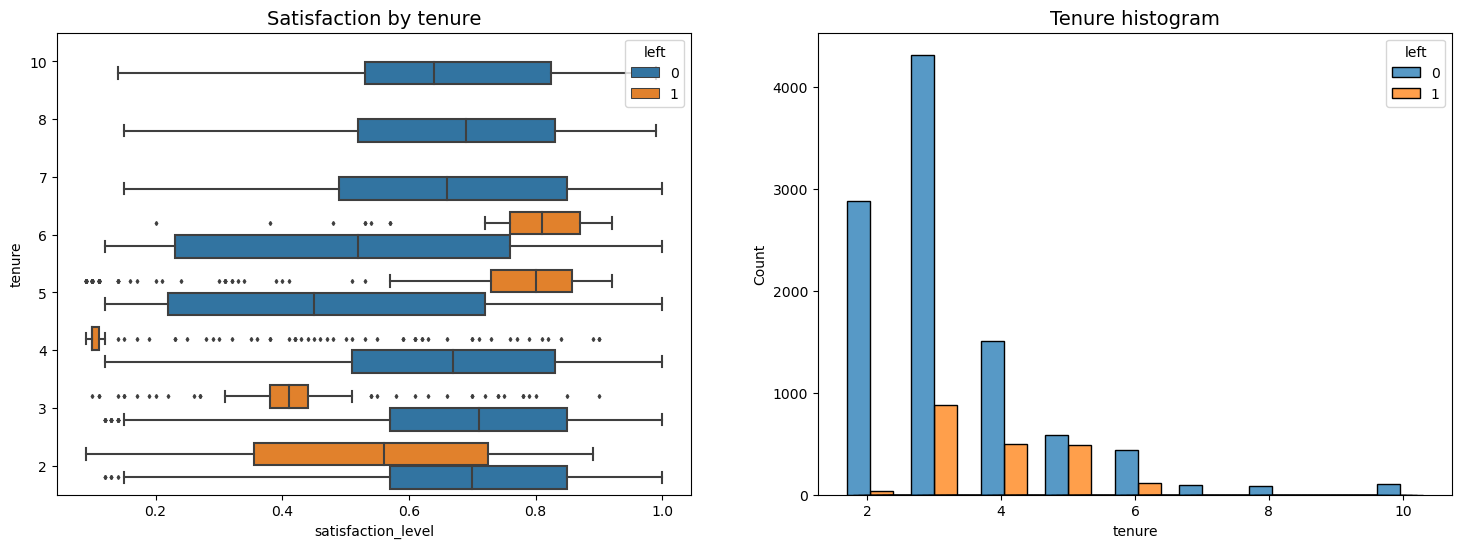

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', fliersize=2, orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=8, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations to be made from this plot
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- `Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.`
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, we could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [18]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [19]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed. 

Next, we could examine salary levels for different tenures.

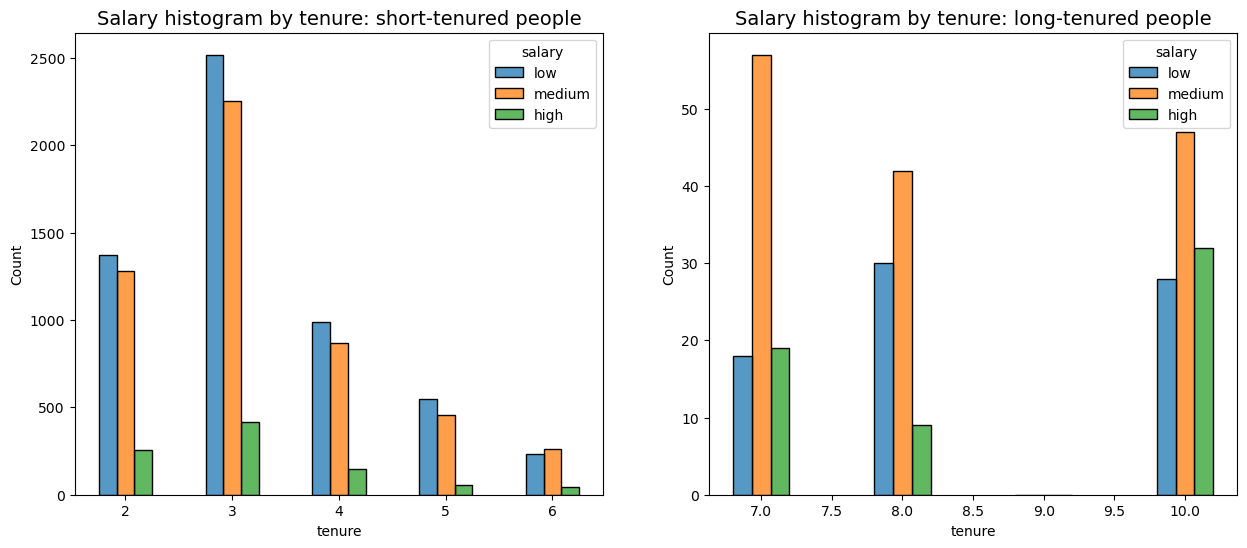

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

In [24]:
print(tenure_long.shape)
print(tenure_short.shape)

(282, 10)
(11709, 10)


**Quick Insight:**

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, we could examine whether employees who worked very long hours were promoted in the last five years.

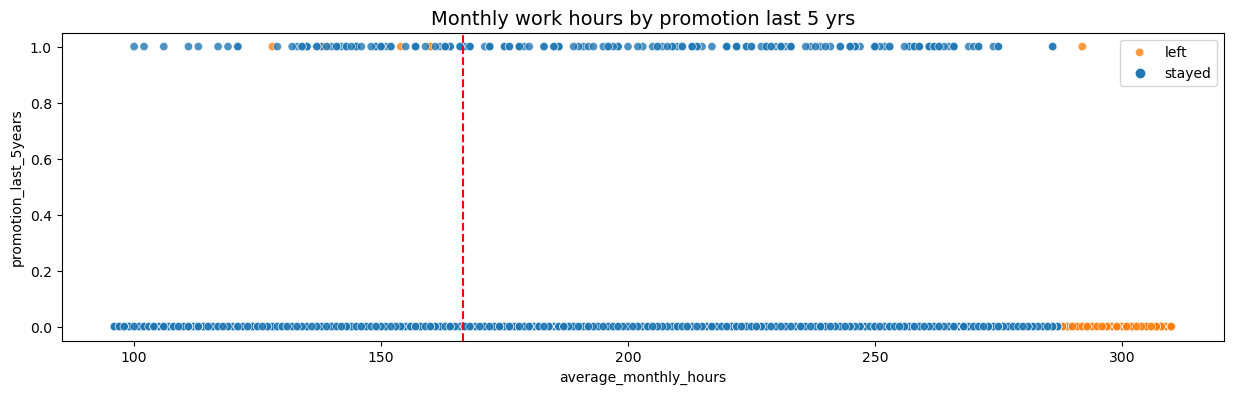

In [37]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize= (15,4))
sns.scatterplot(data= df1, x='average_monthly_hours', y='promotion_last_5years', hue= 'left', alpha= 0.8)
plt.axvline(x=166.67, color= 'red', ls='--')
plt.legend(labels=['left', 'stayed'])
plt.title("Monthly work hours by promotion last 5 yrs", fontsize='14')
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, we could inspect how the employees who left are distributed across departments.

<Axes: xlabel='Count', ylabel='department'>

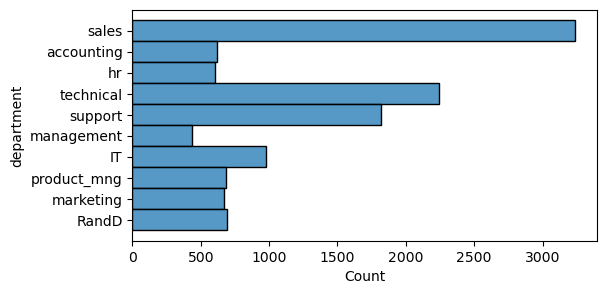

In [49]:
plt.figure(figsize= (6,3))
sns.histplot(data= df1, y='department')

**Quick Insight:**

The above plot shows the  various department and their respective count in the data.

We see that the `sales` department has the most number of employees, then `technical` department, and the others follow

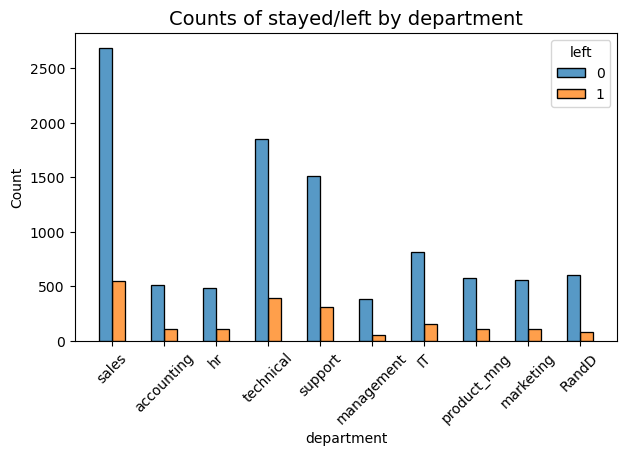

In [73]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(7,4))
sns.histplot(data=df1, x='department', hue='left', discrete=9, 
             hue_order=[0, 1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, we will check for strong correlations between variables in the data.

C:\Users\user\AppData\Local\Temp\ipykernel_2804\3413583762.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(method= 'pearson'), annot=True)


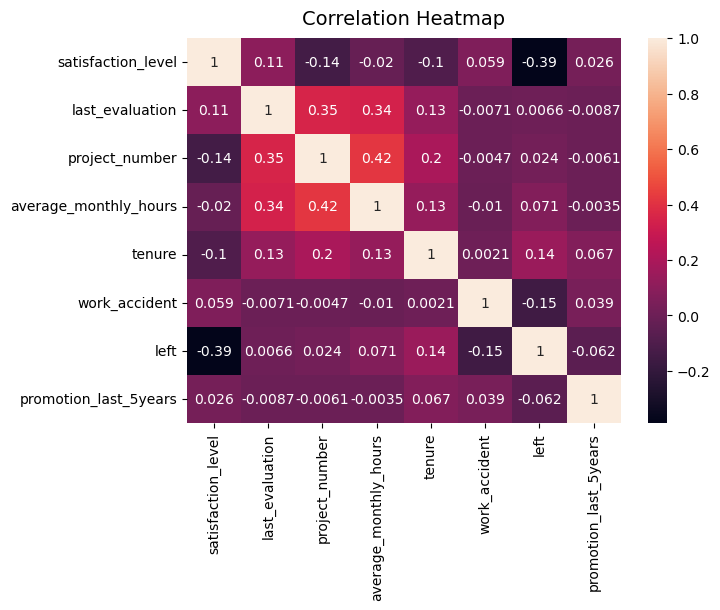

In [82]:
# Plot a correlation heatmap
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(df0.corr(method= 'pearson'), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 